# Predicting Bike Sharing Demand Using Linear Regression 

## 1. Preprocessing the Data:

### 1.1  Inspect the Dataset

-  Load and display the dataset

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('BikeSharingAssignment - BikeSharingAssignment.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


- Check for missing values and duplicates

In [2]:
df.isnull().sum() # the result say we don't have any missing valuee

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [3]:
df[df.duplicated()] # the result say we don't have any duplicated value

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


### 1.2. Handle Missing Data:  

- we dont need to this point because the data dont have any missing value

### 1.3 Encode Categorical Variables:  

- this step is unnecessary because all data is numeric ,we can say the one-hot encoding is Done✅

## 2. Exploratory Data Analysis

### 2.1 Analyze the Target Variable 

- the target is count column 

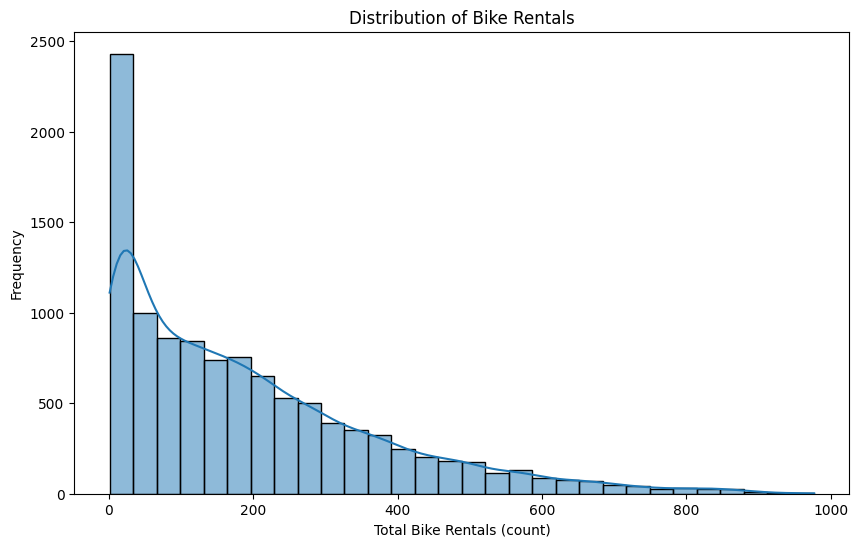

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['count'], bins=30, kde=True)
plt.xlabel("Total Bike Rentals (count)")
plt.ylabel("Frequency")
plt.title("Distribution of Bike Rentals")
plt.show()

### 2.2 Analyze Relationships <a id="target"></a>

- the relation between count and hour

In [5]:
df['datetime'] = pd.to_datetime(df['datetime'])

df['hour'] = df['datetime'].dt.hour


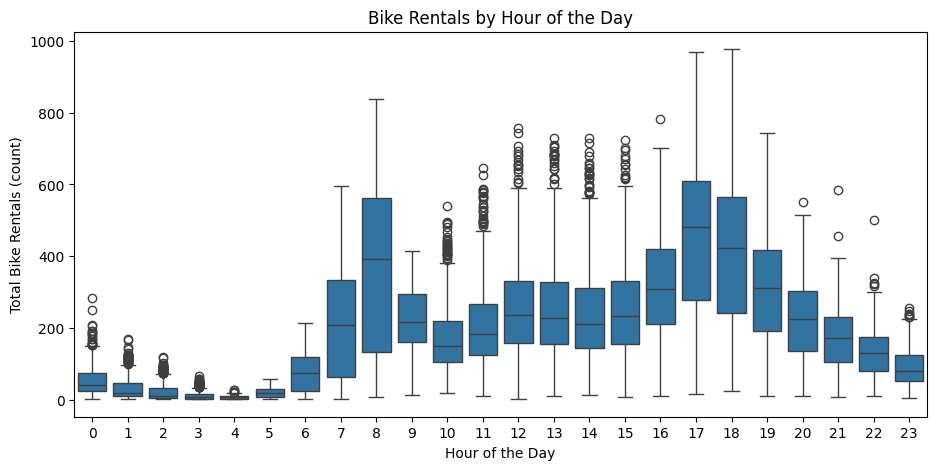

In [6]:
plt.figure(figsize=(11, 5))
sns.boxplot(x=df['hour'], y=df['count'])
plt.xlabel("Hour of the Day")
plt.ylabel("Total Bike Rentals (count)")
plt.title("Bike Rentals by Hour of the Day")
plt.show()

- the relation between count and season 

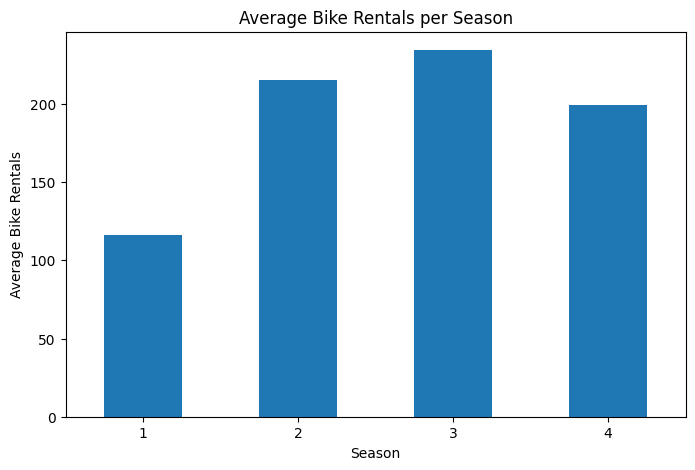

In [7]:
season_avg_rentals = df.groupby('season')['count'].mean()

# Create a bar chart
plt.figure(figsize=(8, 5))
season_avg_rentals.plot(kind='bar')

# Labels and title
plt.xlabel("Season")
plt.ylabel("Average Bike Rentals")
plt.title("Average Bike Rentals per Season")
plt.xticks(rotation=0)

# Show plot
plt.show()

### 2.3 Correlation Analysis

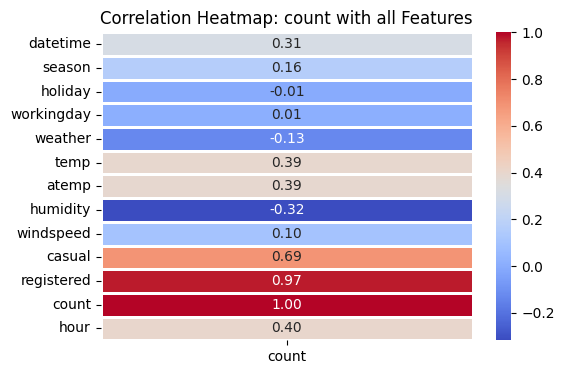

In [8]:
corrMatrix = df.corr()["count"]
plt.figure(figsize=(6, 4))
corr_df = corrMatrix.to_frame()

sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1)
plt.title("Correlation Heatmap: count with all Features")
plt.show()

## 3. Feature Engineering: 


### 3.1 Create New Features
-   really I create a new feature in this cell, look at cell 5
[Go to Cell](#target)


### 3.2 Explain Feature Importance: 
- when I did a manual check in the data, I tried to look at the rows containing high numbers in the count column and look at datetime column, so I see the elation between the count and the hour in the day, and if we look at the heat map, we can see the strong correlation between count and hour

##  4.Build and Evaluate a Linear Regression Model:  

### 4.1 Train-Test Split

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = df[['temp', 'atemp', 'humidity', 'windspeed', 'season', 'holiday', 'workingday', 'weather']]
y = df['count']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 4.2 Train the Model

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

### 4.3 Evaluate the Model

In [12]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R² Score: {r2:.2f}')

MAE: 115.04
RMSE: 154.62
R² Score: 0.28


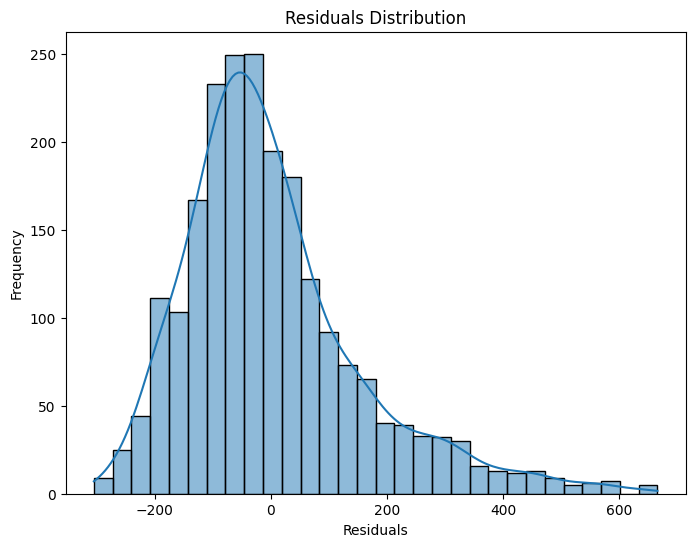

In [13]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()